In [9]:
import os
from glob import glob

# Define the directory containing your Fluent files
fluent_files_dir = "/home/jbu2/Downloads/Second Order Upwind_Least Square Cell Based_SA model-20241217T191003Z-001/Second Order Upwind_Least Square Cell Based_SA model/"

# File paths
glob(os.path.join(fluent_files_dir, "*.cas"))
case_file = glob(os.path.join(fluent_files_dir, "*.cas.h5"))[0]
data_file = glob(os.path.join(fluent_files_dir, "*.dat.h5"))[0]


In [14]:
import h5py

def visualize_h5(h5_file_path):
    # Open the HDF5 file
    print(f"Opening HDF5 file: {h5_file_path}")
    with h5py.File(h5_file_path, "r") as h5_file:
        # Print all groups and datasets in the file
        def print_h5_structure(name, obj):
            if isinstance(obj, h5py.Group):
                print(f"Group: {name}")
            elif isinstance(obj, h5py.Dataset):
                print(f"Dataset: {name} | Shape: {obj.shape} | Dtype: {obj.dtype}")
    
        print("\nStructure of the HDF5 file:")
        h5_file.visititems(print_h5_structure)
    

In [54]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Define the directory containing your Fluent files
fluent_files_dir = "/home/jbu2/Downloads/Second Order Upwind_Least Square Cell Based_SA model-20241217T191003Z-001/Second Order Upwind_Least Square Cell Based_SA model/"

# File paths
case_file = glob(os.path.join(fluent_files_dir, "*.cas.h5"))[0]
data_file = glob(os.path.join(fluent_files_dir, "*.dat.h5"))[0]

# Step 1: Load node coordinates (mesh) from the case file
with h5py.File(case_file, 'r') as fmesh:
    # Extract node coordinates
    node_coords = fmesh['meshes/1/nodes/coords/1'][:]  # Shape: (Nnodes, 2)
    print(f"Node coordinates shape: {node_coords.shape}")

    # For simplicity, we'll use node_coords as the base for visualization.
    # For unstructured meshes, centroids may need to be computed per cell.

# Step 2: Load flow field data (U, V velocity components) from the data file
with h5py.File(data_file, 'r') as fdata:
    # Extract velocity components per cell
    SV_U = fdata['results/1/phase-1/cells/SV_U/1'][:]  # Shape: (Ncells,)
    SV_V = fdata['results/1/phase-1/cells/SV_V/1'][:]  # Shape: (Ncells,)
    print(f"Velocity components U shape: {SV_U.shape}, V shape: {SV_V.shape}")

    # For simplicity, assume the number of centroids matches the number of cells
    # Replace this with actual cell centroid computation if needed
    Ncells = len(SV_U)
    cell_centroids = node_coords[:Ncells, :]  # Placeholder: Use first Ncells node_coords

mask = np.logical_and(
    np.logical_and(
        cell_centroids[:, 0] > -0.1, 
        cell_centroids[:, 0] < 0.5,
    ),
    np.logical_and(
        cell_centroids[:, 1] > -0.1, 
        cell_centroids[:, 1] < 0.1,    
    )
)
cell_centroids = cell_centroids[mask]
SV_U = SV_U[mask]
SV_V = SV_V[mask]
print(f"Masked node coordinates shape: {cell_centroids.shape}")
print(f"Masked velocity components U shape: {SV_U.shape}, V shape: {SV_V.shape}")

# Step 3: Compute velocity magnitude for coloring
velocity_magnitude = np.sqrt(SV_U**2 + SV_V**2)

Node coordinates shape: (197600, 2)
Velocity components U shape: (196398,), V shape: (196398,)
Masked node coordinates shape: (60001, 2)
Masked velocity components U shape: (60001,), V shape: (60001,)


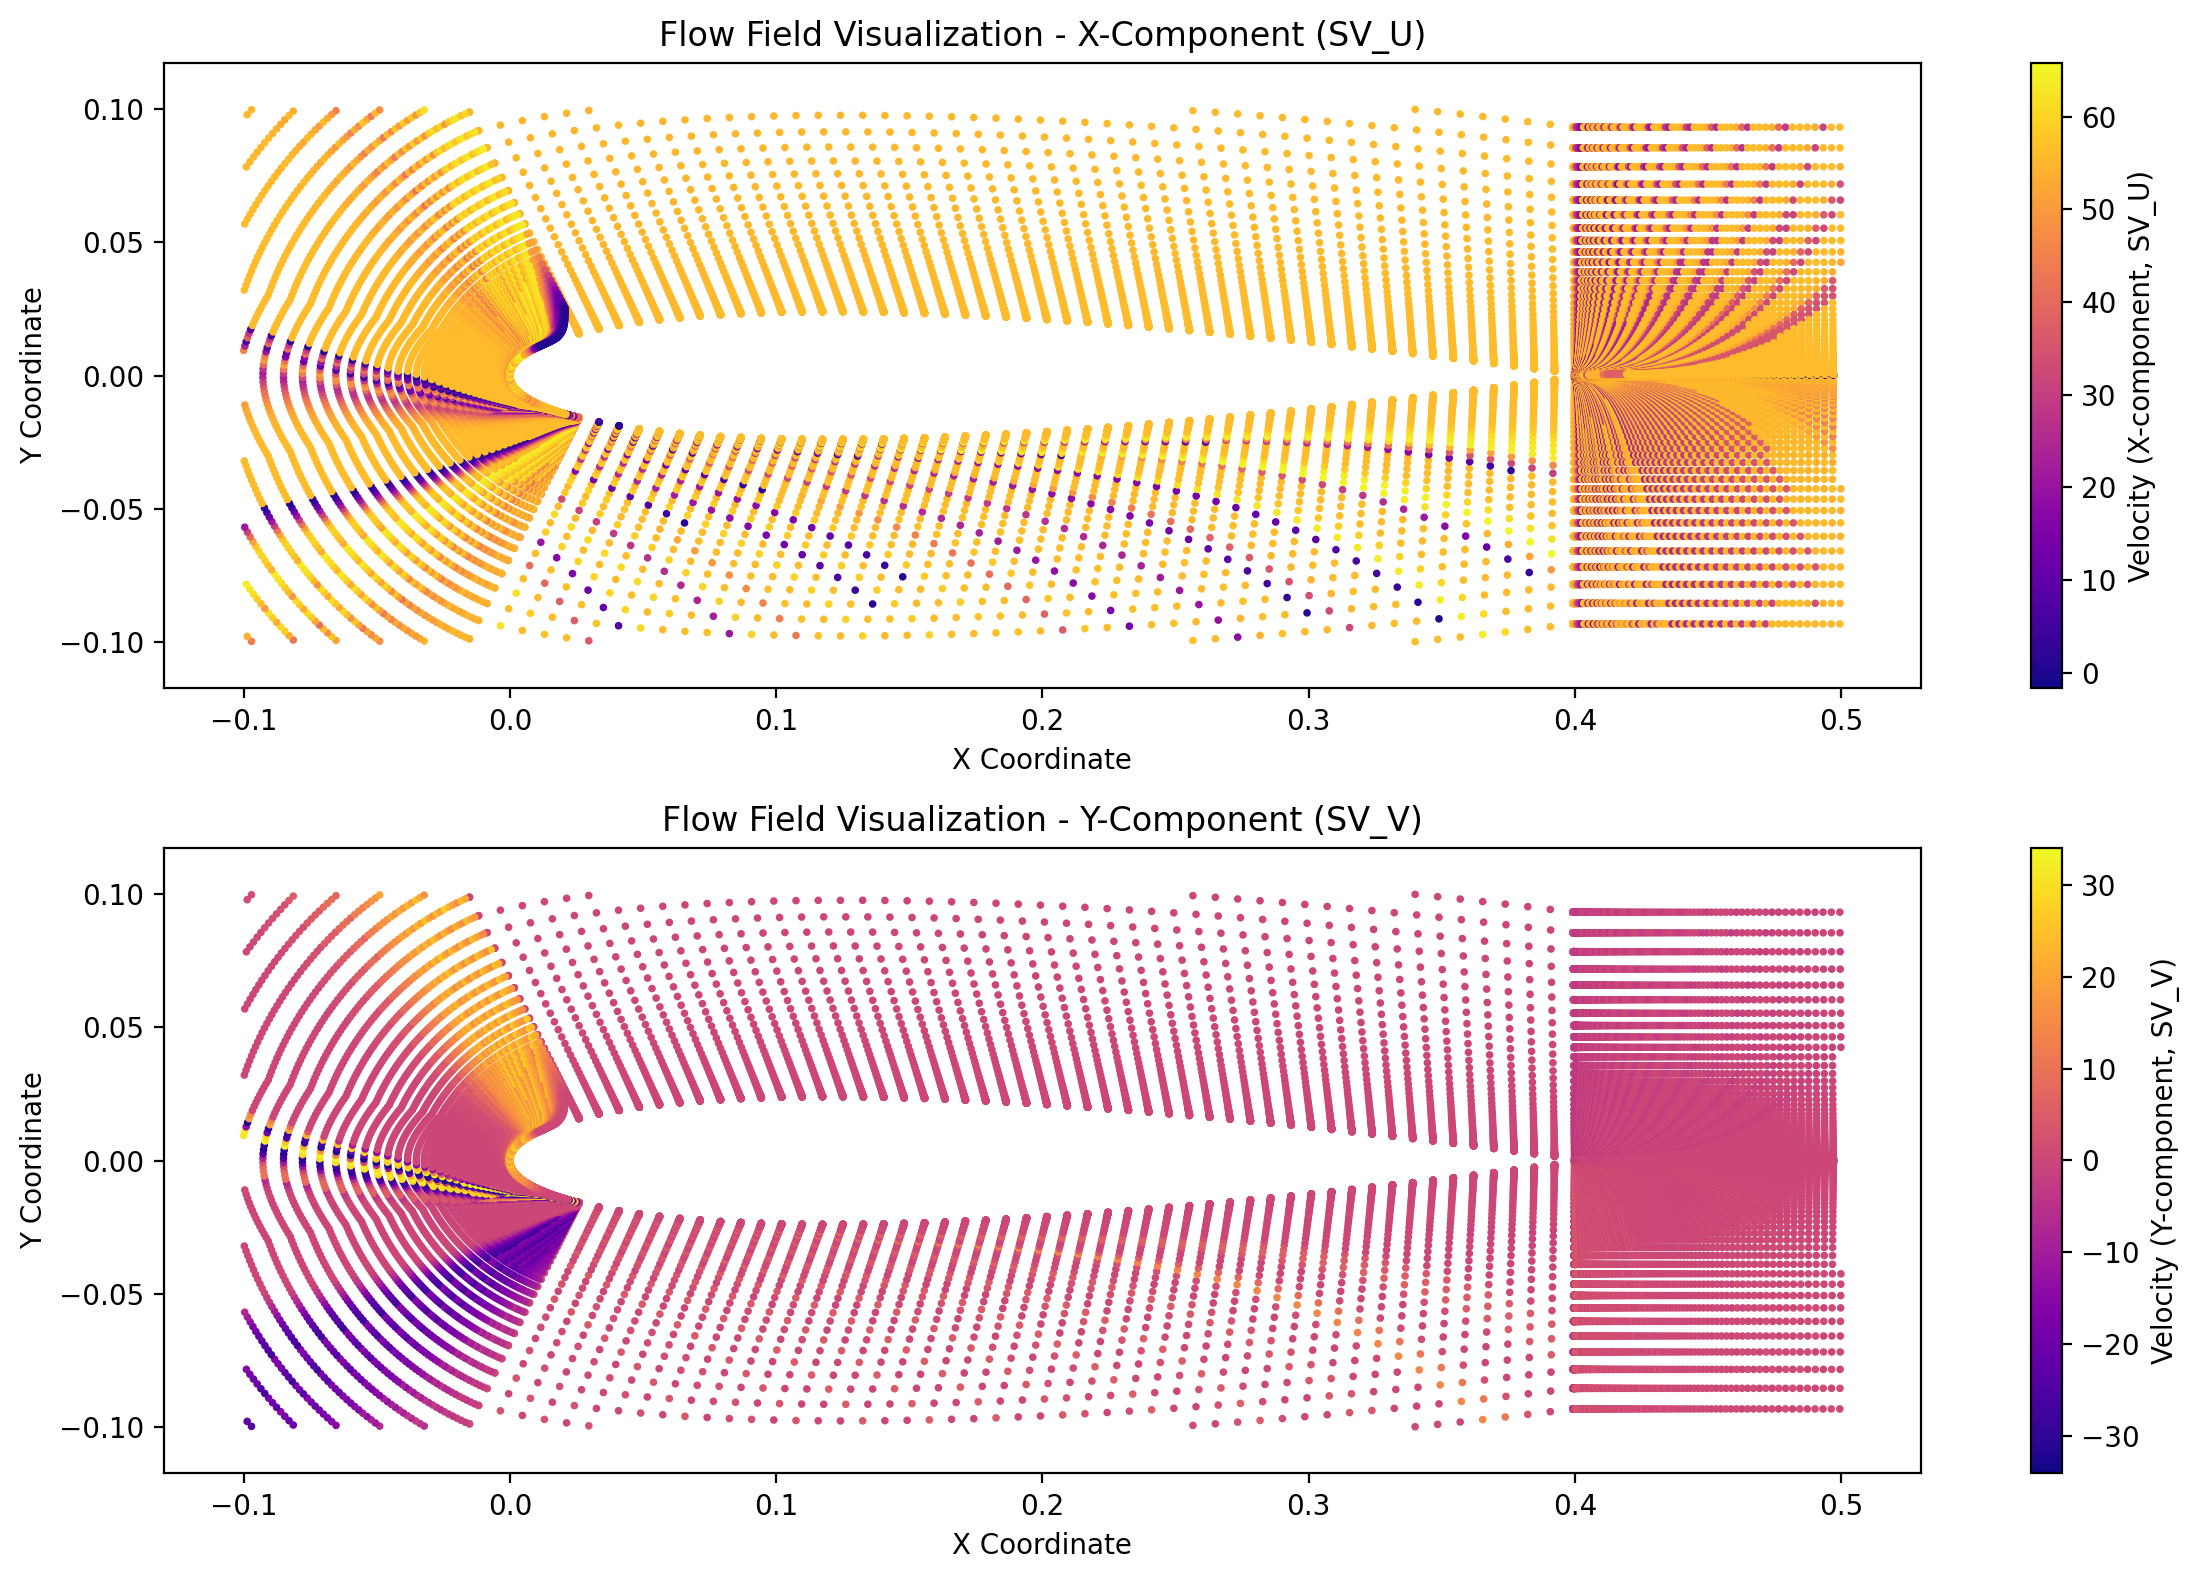

In [64]:
# Step 4: Visualize the flow field using two scatter plots

plt.figure(figsize=(12, 8), dpi=200)

# Scatter plot for SV_U (X-component of velocity)
plt.subplot(2, 1, 1)
plt.scatter(cell_centroids[:, 0], cell_centroids[:, 1], 
            c=SV_U, cmap='plasma', s=3, marker='o')
plt.colorbar(label='Velocity (X-component, SV_U)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Flow Field Visualization - X-Component (SV_U)')
plt.axis('equal')

# Scatter plot for SV_V (Y-component of velocity)
plt.subplot(2, 1, 2)
plt.scatter(cell_centroids[:, 0], cell_centroids[:, 1], 
            c=SV_V, cmap='plasma', s=3, marker='o')
plt.colorbar(label='Velocity (Y-component, SV_V)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Flow Field Visualization - Y-Component (SV_V)')
plt.axis('equal')

plt.tight_layout()
